## Task 2: Sentiment and Thematic Analysis

## This notebook runs the sentiment and thematic analysis pipeline using VADER for sentiment analysis, displays results, and visualizes outputs.

### Setup


Processing: cleaned_bank_of_abyssinia_20250612_145335.csv
Saved: /home/ablex/Development/AI/kifiya_week2/fintech-app-reviews/data/analysis/analysis_bank_of_abyssinia_20250612_152342.csv
+----+----------+-------------------+--------------+---------+
|    |   rating | sentiment_label   |         mean |   count |
|----+----------+-------------------+--------------+---------|
|  0 |        1 | NEGATIVE          | -0.556377    |     102 |
|  1 |        1 | NEUTRAL           | -0.00053662  |      71 |
|  2 |        1 | POSITIVE          |  0.47727     |      44 |
|  3 |        2 | NEGATIVE          | -0.399325    |       4 |
|  4 |        2 | NEUTRAL           |  0           |       8 |
|  5 |        2 | POSITIVE          |  0.499725    |       4 |
|  6 |        3 | NEGATIVE          | -0.5605      |       4 |
|  7 |        3 | NEUTRAL           |  0           |      13 |
|  8 |        3 | POSITIVE          |  0.471       |      18 |
|  9 |        4 | NEUTRAL           |  0           |     

/tmp/ipykernel_17224/2359710995.py:48: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/ablex/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


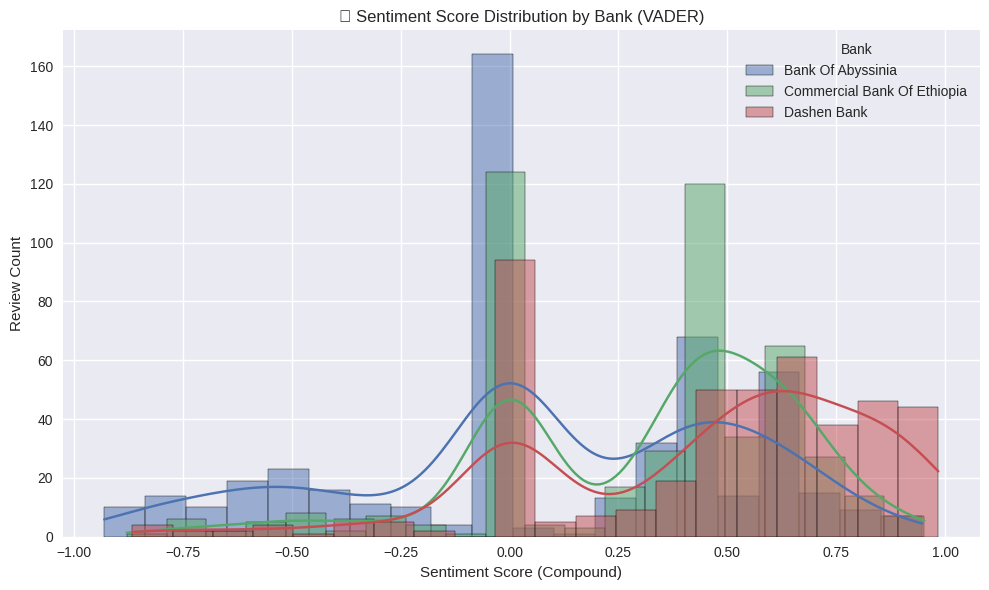

/tmp/ipykernel_17224/2359710995.py:66: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_17224/2359710995.py:66: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/ablex/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128450 (\N{CARD INDEX DIVIDERS}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ablex/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


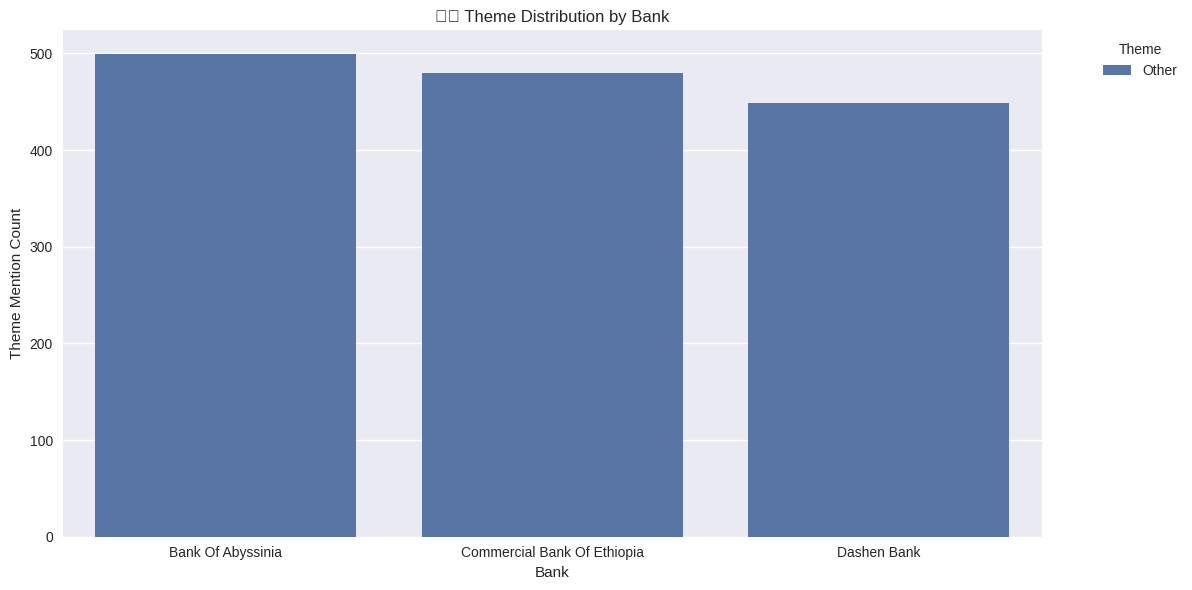

/tmp/ipykernel_17224/2359710995.py:76: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/ablex/anaconda3/envs/myenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


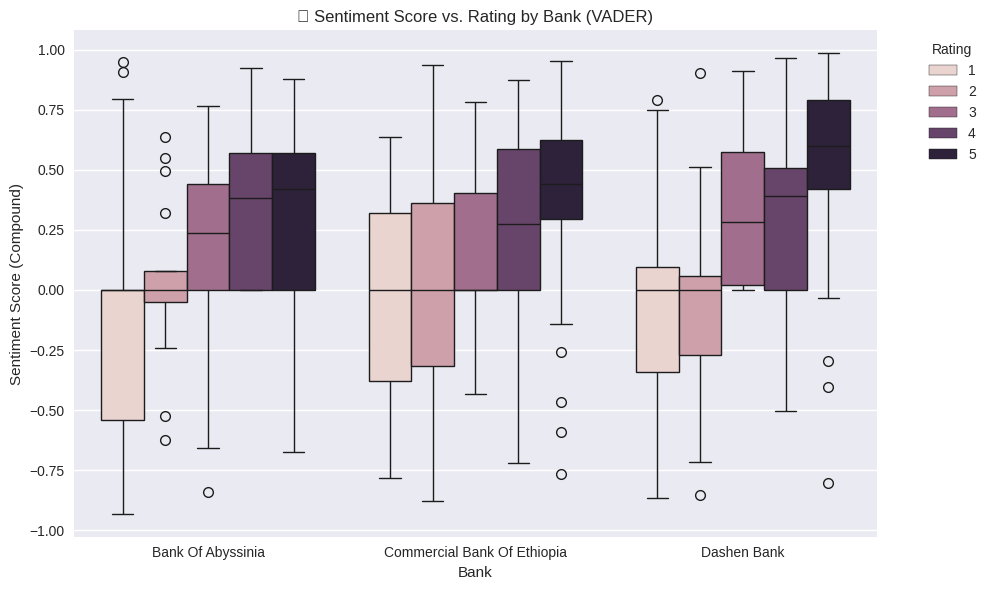

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Configure paths
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import analysis function
from scripts.analysis.task2_analysis import process_reviews

# Set plot style
plt.style.use('seaborn-v0_8')
%matplotlib inline

# --- Run Analysis Pipeline ---
results_df = process_reviews()

# --- Preview Results ---
if results_df is not None:
    print("\n🔍 First 5 rows of the combined results:")
    print(tabulate(results_df.head(), headers='keys', tablefmt='psql', showindex=True, maxcolwidths=[None, 40, None, None, None, None, None, None, 20]))

    print("\n📌 Sample rows from each bank:")
    for bank in results_df['bank'].unique():
        print(f"\n=== {bank.upper()} ===")
        bank_sample = results_df[results_df['bank'] == bank].sample(min(3, len(results_df[results_df['bank'] == bank])), random_state=42)
        print(tabulate(bank_sample[['review', 'rating', 'sentiment_label', 'sentiment_score', 'themes']],
                       headers='keys', tablefmt='grid', showindex=False, maxcolwidths=[40, None, None, None, 30]))

# --- Visualizations ---
if results_df is not None:
    
    # 1. Sentiment Score Distribution
    plt.figure(figsize=(10, 6))
    for bank in results_df['bank'].unique():
        sns.histplot(data=results_df[results_df['bank'] == bank],
                     x='sentiment_score', label=bank, kde=True, bins=20)
    plt.title('🧭 Sentiment Score Distribution by Bank (VADER)')
    plt.xlabel('Sentiment Score (Compound)')
    plt.ylabel('Review Count')
    plt.legend(title='Bank')
    plt.tight_layout()
    plt.show()

    # 2. Theme Distribution by Bank
    theme_counts = []
    for bank in results_df['bank'].unique():
        for row in results_df[results_df['bank'] == bank].itertuples():
            for theme in row.themes:
                theme_counts.append({'bank': bank, 'theme': theme})
    theme_df = pd.DataFrame(theme_counts)
    theme_summary = theme_df.groupby(['bank', 'theme']).size().reset_index(name='count')

    plt.figure(figsize=(12, 6))
    sns.barplot(data=theme_summary, x='bank', y='count', hue='theme')
    plt.title('🗂️ Theme Distribution by Bank')
    plt.xlabel('Bank')
    plt.ylabel('Theme Mention Count')
    plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 3. Sentiment Score vs. Rating by Bank
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=results_df, x='bank', y='sentiment_score', hue='rating')
    plt.title('🎯 Sentiment Score vs. Rating by Bank (VADER)')
    plt.xlabel('Bank')
    plt.ylabel('Sentiment Score (Compound)')
    plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
